<a href="https://colab.research.google.com/github/Shubham080997/Taxi_Surge_Pricing/blob/main/Copy_of_Taxi_surge_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT ON TAXI MOBILITY SURGE PRICE PREDICTION**

Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from anywhere in the cities they operate in. They, in turn, search for cabs from various service providers and provide the best option to their clients across available options. They have been in operation for a little less than a year now. During this period, they have captured surge pricing types from the service providers. The main objective is to build a predictive model, which could help them in predicting the surge pricing type proactively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.


● Trip_ID: ID for TRIP

● Trip_Distance: The distance for the trip requested by the customer

● TypeofCab: Category of the cab requested by the customer

● CustomerSinceMonths: Customer using cab services since n months; 0 month means the current month

● LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour

● ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

● Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.

● Customer_Rating: Average of lifetime ratings of the customer till date

● CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

● Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for

modelling purposes

● Gender: Gender of the customer

● SurgePricingType: Target (can be of 3 types) - DV

Importing the necessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
taxi_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 5/Week 1/Day 1/data_sigma_cabs.csv')

In [4]:
taxi_df.head(10)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2
9,T0005689474,107.19,D,5.0,3.04467,B,A,2.44375,1,NaN,58,83,Male,3


In [5]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [6]:
taxi_copy = taxi_df.copy()

In [7]:
taxi_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Trip_ID,131662,131662,T0005811120,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trip_Distance,131662,NaN,NaN,NaN,44.2009,25.5229,0.31,24.58,38.2,60.73,109.23
Type_of_Cab,111452,5,B,31136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Since_Months,125742,NaN,NaN,NaN,6.01666,3.62689,0,3,6,10,10
Life_Style_Index,111469,NaN,NaN,NaN,2.80206,0.225796,1.59638,2.65473,2.79805,2.94678,4.87511
Confidence_Life_Style_Index,111469,3,B,40355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination_Type,131662,14,A,77597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Rating,131662,NaN,NaN,NaN,2.84946,0.980675,0.00125,2.1525,2.895,3.5825,5
Cancellation_Last_1Month,131662,NaN,NaN,NaN,0.782838,1.03756,0,0,0,1,8
Var1,60632,NaN,NaN,NaN,64.2027,21.8204,30,46,61,80,210


In [8]:
taxi_df.duplicated().sum()

0

In [9]:
# Getting the info of null values
taxi_df.dropna().isna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41608 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Trip_ID                      41608 non-null  bool 
 1   Trip_Distance                41608 non-null  bool 
 2   Type_of_Cab                  41608 non-null  bool 
 3   Customer_Since_Months        41608 non-null  bool 
 4   Life_Style_Index             41608 non-null  bool 
 5   Confidence_Life_Style_Index  41608 non-null  bool 
 6   Destination_Type             41608 non-null  bool 
 7   Customer_Rating              41608 non-null  bool 
 8   Cancellation_Last_1Month     41608 non-null  bool 
 9   Var1                         41608 non-null  bool 
 10  Var2                         41608 non-null  bool 
 11  Var3                         41608 non-null  bool 
 12  Gender                       41608 non-null  bool 
 13  Surge_Pricing_Type           41608 non-null  

In [10]:
# Checking of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

# Calculating the VIF factor
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# Getting the VIF factor for the variable
calc_vif(taxi_df[[i for i in taxi_df.describe().columns if i not in ['Surge_Pricing_Type']]].dropna())

,variables,VIF
0,Trip_Distance,4.873858
1,Customer_Since_Months,4.024759
2,Life_Style_Index,145.365898
3,Customer_Rating,12.332220
4,Cancellation_Last_1Month,1.648301
5,Var1,9.124250
6,Var2,156.300582
7,Var3,89.595027


In [12]:
# Dropping the Trip_Id column as it is not of much importance
taxi_df.drop(columns=['Trip_ID'],inplace=True)

In [13]:
taxi_copy.drop(columns=['Trip_ID'],inplace=True)

In [14]:
taxi_df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

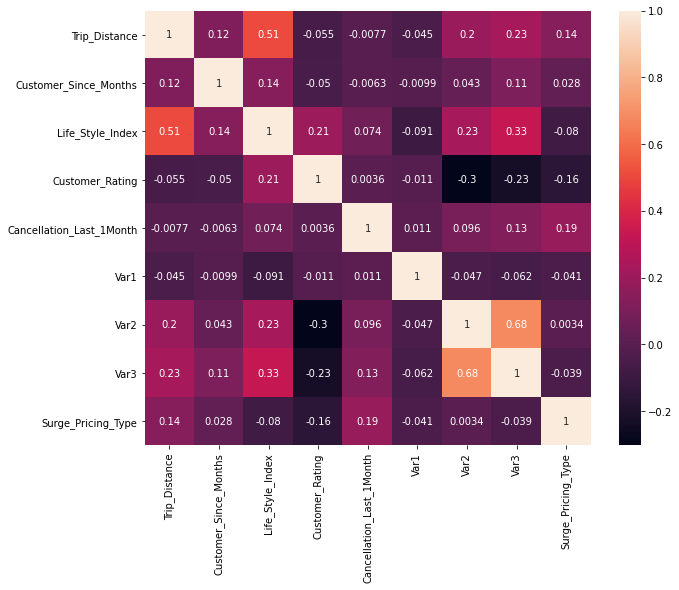

In [15]:
# Getting the correlation details
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(taxi_df.corr(),annot=True)

# Performing EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc56d542d0>,
      dtype=object)

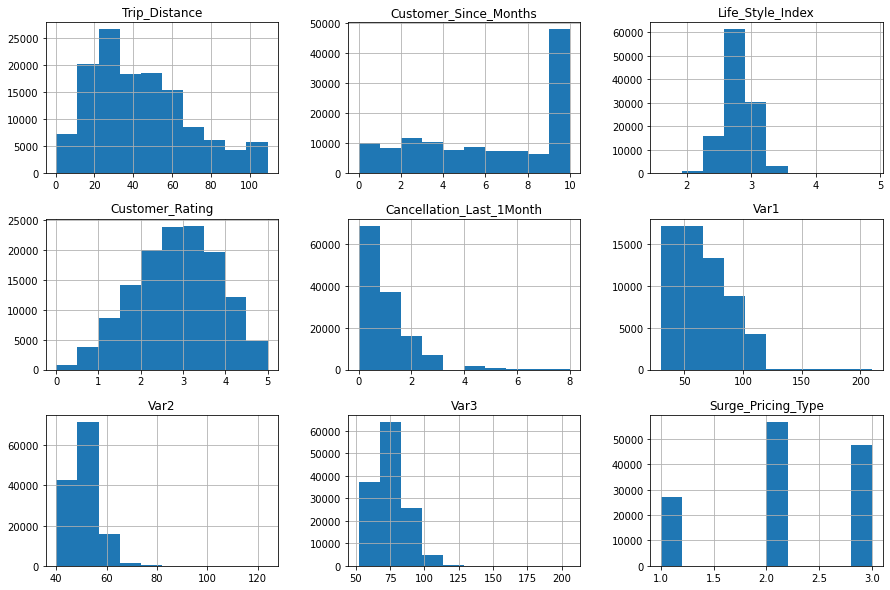

In [16]:
taxi_df.hist(figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


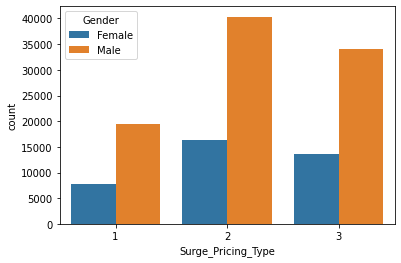

In [17]:
sns.countplot(taxi_df['Surge_Pricing_Type'],hue=taxi_df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


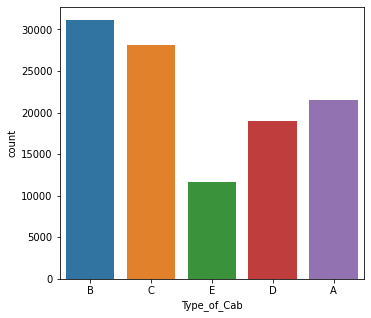

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(taxi_df['Type_of_Cab'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


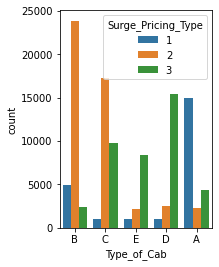

In [19]:
plt.subplot(1,2,2)
sns.countplot(taxi_df['Type_of_Cab'],hue=taxi_df['Surge_Pricing_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


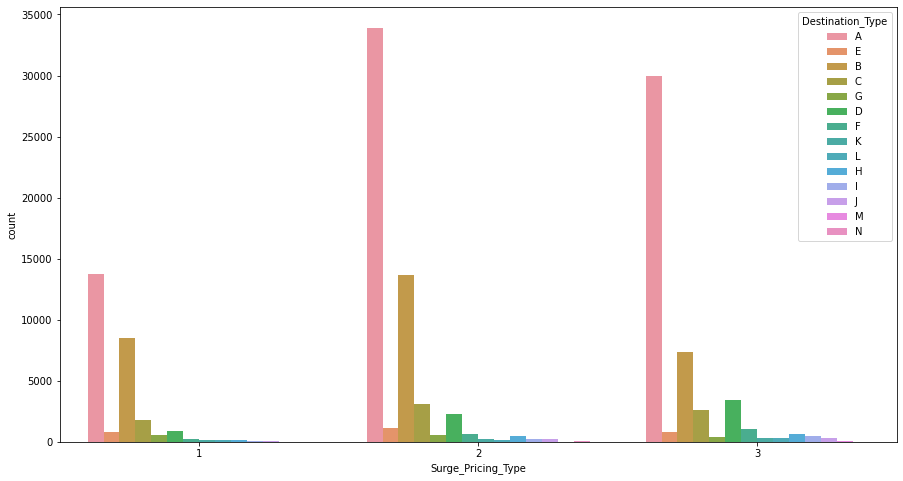

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(taxi_df['Surge_Pricing_Type'],hue=taxi_df['Destination_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


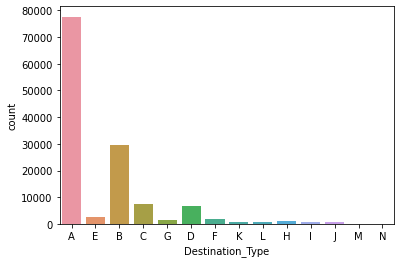

In [21]:
sns.countplot(taxi_df['Destination_Type'])

In [22]:
taxi_df.groupby(['Destination_Type'])['Surge_Pricing_Type'].value_counts()

Destination_Type  Surge_Pricing_Type
A                 2                     33913
                  3                     29932
                  1                     13752
B                 2                     13681
                  1                      8477
                  3                      7397
C                 2                      3093
                  3                      2613
                  1                      1778
D                 3                      3468
                  2                      2260
                  1                       860
E                 2                      1101
                  1                       820
                  3                       796
F                 3                      1061
                  2                       626
                  1                       263
G                 2                       597
                  1                       529
                  3                       3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


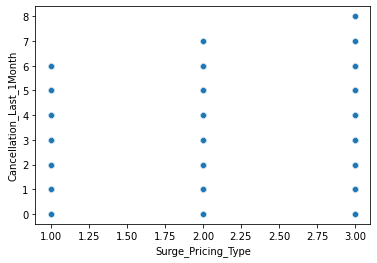

In [23]:
sns.scatterplot(taxi_df['Surge_Pricing_Type'],taxi_df['Cancellation_Last_1Month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


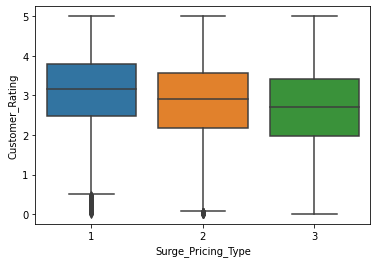

In [24]:
sns.boxplot(taxi_df['Surge_Pricing_Type'],taxi_df['Customer_Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


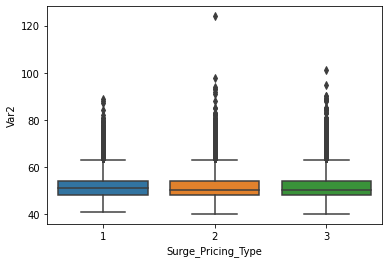

In [25]:
sns.boxplot(taxi_df['Surge_Pricing_Type'],taxi_df['Var2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


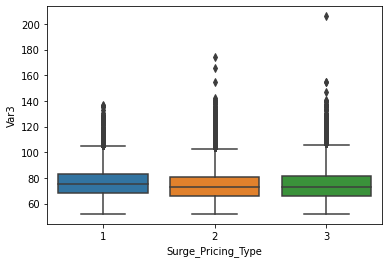

In [26]:
sns.boxplot(taxi_df['Surge_Pricing_Type'],taxi_df['Var3'])

Data Cleaning and Handling Null Values


In [27]:
taxi_df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [28]:
taxi_copy.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [29]:
del taxi_df['Var1']

In [30]:
del taxi_copy['Var1']

In [31]:
# Imputation of all the null values
#taxi_df['Type_of_Cab']=taxi_df['Type_of_Cab'].
#taxi_df['Customer_Since_Months']=taxi_df['Customer_Since_Months'].fillna(taxi_df['Customer_Since_Months'].median())
#taxi_df['Life_Style_Index']=taxi_df['Life_Style_Index'].fillna(taxi_df['Life_Style_Index'].median())
#taxi_df['Confidence_Life_Style_Index']=taxi_df['Confidence_Life_Style_Index'].fillna(taxi_df['Confidence_Life_Style_Index'].mode().iloc[0])
#taxi_df['Var1']=taxi_df['Var1'].fillna(taxi_df['Var1'].median())

In [32]:
taxi_df.dropna(inplace=True)

In [33]:
taxi_copy.dropna(inplace=True)

In [34]:
taxi_copy.isna().any()

Trip_Distance                  False
Type_of_Cab                    False
Customer_Since_Months          False
Life_Style_Index               False
Confidence_Life_Style_Index    False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Surge_Pricing_Type             False
dtype: bool

In [35]:
taxi_df.isna().any()

Trip_Distance                  False
Type_of_Cab                    False
Customer_Since_Months          False
Life_Style_Index               False
Confidence_Life_Style_Index    False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Surge_Pricing_Type             False
dtype: bool

In [36]:
# Using label encoder to change the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

Fitting the label encoder technique to change the dtypes of the feature for the original dataset

In [37]:
taxi_df['Type_of_Cab']=encoder.fit_transform(taxi_df['Type_of_Cab'])
taxi_df['Confidence_Life_Style_Index']=encoder.fit_transform(taxi_df['Confidence_Life_Style_Index'])
taxi_df['Destination_Type']=encoder.fit_transform(taxi_df['Destination_Type'])
taxi_df['Gender']=encoder.fit_transform(taxi_df['Gender'])

Fitting the label encoder technique to change the dtypes of the feature for the copied dataset

In [38]:
taxi_copy['Type_of_Cab']=encoder.fit_transform(taxi_copy['Type_of_Cab'])
taxi_copy['Confidence_Life_Style_Index']=encoder.fit_transform(taxi_copy['Confidence_Life_Style_Index'])
taxi_copy['Destination_Type']=encoder.fit_transform(taxi_copy['Destination_Type'])
taxi_copy['Gender']=encoder.fit_transform(taxi_copy['Gender'])

Dropping the null values from copy data set

In [39]:
taxi_copy.dropna(inplace = True)

Verifying to see that no null value is present

In [40]:
taxi_copy.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [41]:
taxi_df.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [42]:
taxi_df.duplicated().sum()

0

Checking the Dtypes of original as well copy data set

In [43]:
taxi_df.dtypes

Trip_Distance                  float64
Type_of_Cab                      int64
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index      int64
Destination_Type                 int64
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                           int64
Surge_Pricing_Type               int64
dtype: object

In [44]:
taxi_copy.dtypes

Trip_Distance                  float64
Type_of_Cab                      int64
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index      int64
Destination_Type                 int64
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                           int64
Surge_Pricing_Type               int64
dtype: object

**Visualisation**(After treating null values)

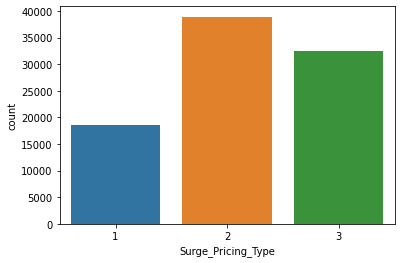

In [45]:
sns.countplot(x=taxi_df['Surge_Pricing_Type'])

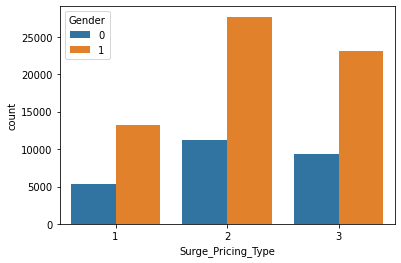

In [46]:
sns.countplot(x=taxi_df['Surge_Pricing_Type'],hue=(taxi_df['Gender']))

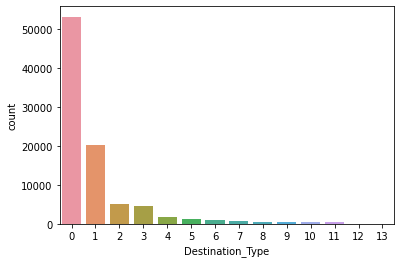

In [47]:
sns.countplot(x=taxi_df['Destination_Type'])

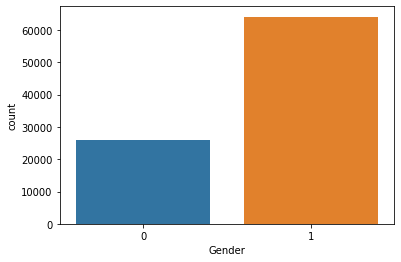

In [48]:
sns.countplot(x=taxi_df['Gender']) # 1 for male; 0 for Female

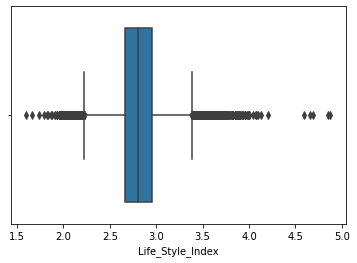

In [49]:
sns.boxplot(x=taxi_df['Life_Style_Index'])

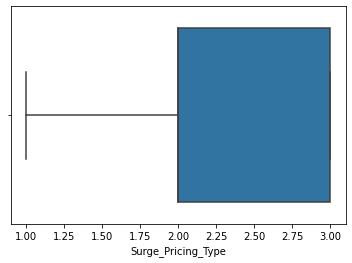

In [50]:
sns.boxplot(x=taxi_df['Surge_Pricing_Type'])

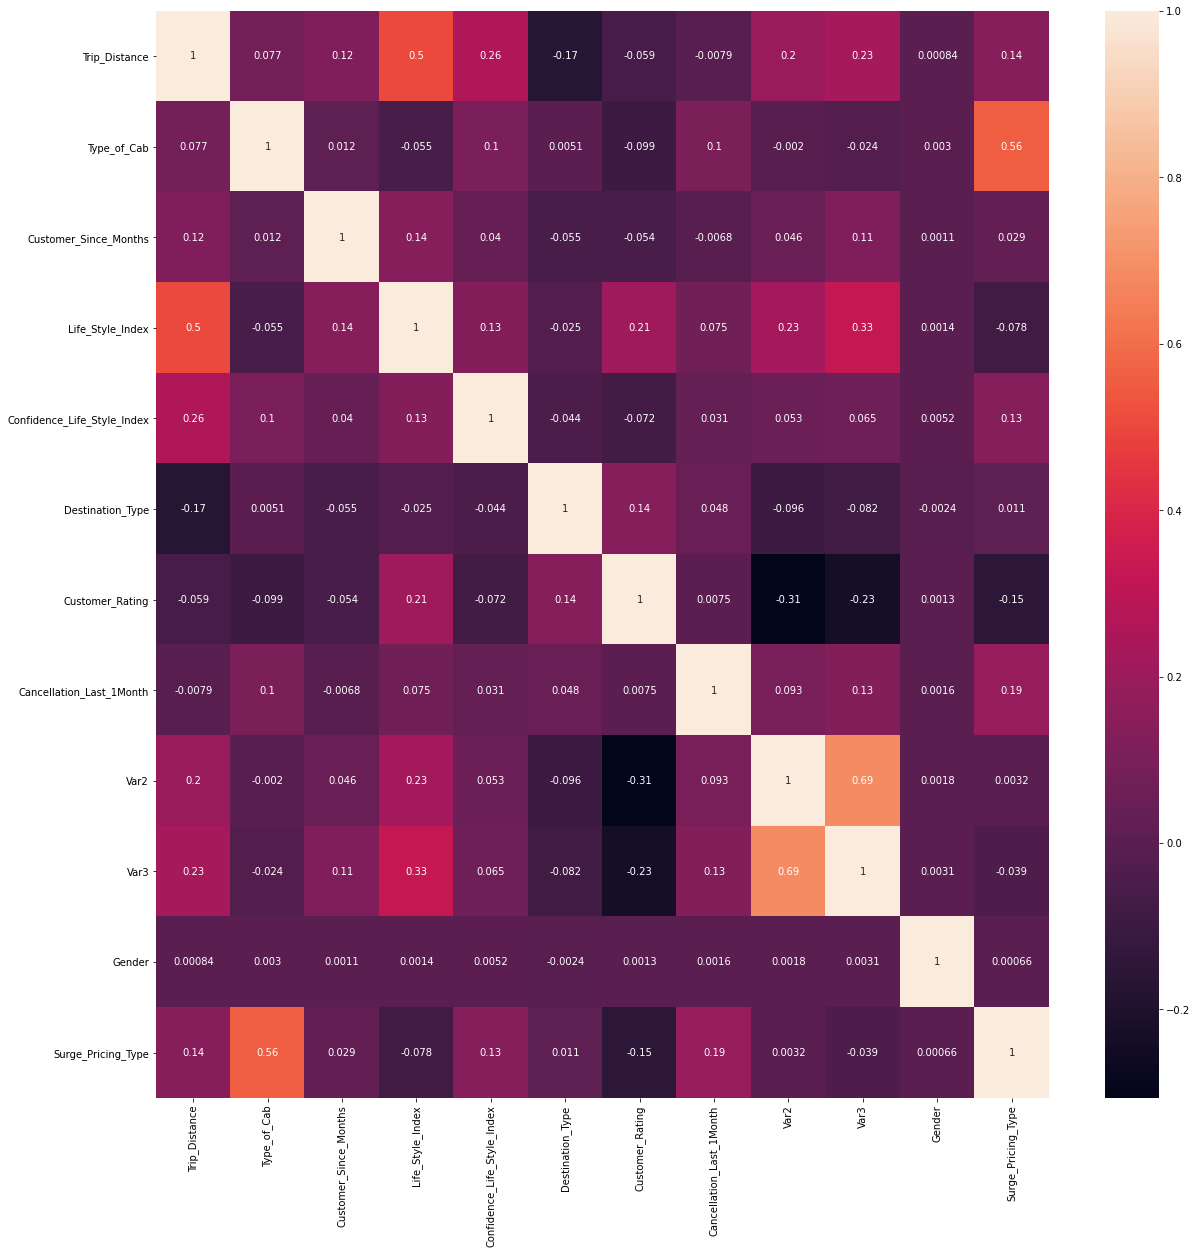

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(taxi_df.corr(),annot=True)

**Feature Selection**


Creating the predictor and Target variables.

In [52]:
x=taxi_copy.iloc[:,taxi_copy.columns !='Surge_Pricing_Type']
y=taxi_copy['Surge_Pricing_Type']
x.shape

(90052, 11)

In [53]:
taxi_copy.dtypes

Trip_Distance                  float64
Type_of_Cab                      int64
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index      int64
Destination_Type                 int64
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                           int64
Surge_Pricing_Type               int64
dtype: object

Imputing Extra tree classifier to see the importance of each features

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()

Getting the scores for every feature
We can infer that Type_Of_Cab is the most significant feature

In [55]:
ET.fit(x,y)
imp_features=pd.Series(ET.feature_importances_,index=x.columns).sort_values(ascending=False)
imp_features
#The features with the lowest scores can be removed.

Type_of_Cab                    0.327432
Trip_Distance                  0.107219
Life_Style_Index               0.101098
Customer_Rating                0.101075
Var3                           0.091770
Var2                           0.084332
Customer_Since_Months          0.061679
Destination_Type               0.044425
Cancellation_Last_1Month       0.036437
Confidence_Life_Style_Index    0.026562
Gender                         0.017971
dtype: float64

Imputing Mutual Info Classification to see the importance via graph
Even here we cab see that Type_of_cab is the most significant feature which concludes that it is the best feature with utmost important.

<function matplotlib.pyplot.show>

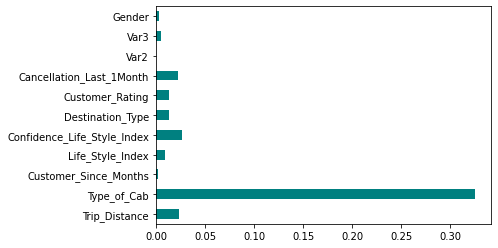

In [56]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

data = mutual_info_classif(x,y)
data1 = pd.Series(data, taxi_df.columns[0:len(taxi_df.columns)-1])
data1.plot(kind= 'barh', color = 'teal')
plt.show

Imputing Different Scores

In [57]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

In [58]:
y.shape

(90052,)

Applying train_test_split
I have performed it multiple times:
One without feature selection.
Another with feature selection.

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_train.shape

(63036,)

In [60]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
xs_train = scaler.fit_transform(x_train)
#x_test = x_test.to_numpy()
#x_test = x_test.reshape(-1,1)
xs_test = scaler.fit_transform(x_test)

Importing Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=500)


In [63]:
y_train

107587    1
64553     1
92184     1
47045     3
32824     3
         ..
70558     1
103778    1
106784    3
81011     3
16474     1
Name: Surge_Pricing_Type, Length: 63036, dtype: int64

Fitting the model

In [64]:
model = log.fit(x_train,y_train)
y_pred1 = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Getting the below scores i.e without feature selection.

In [65]:
accuracy_score(y_test,y_pred1)*100

68.20772875333135

In [66]:
from sklearn.metrics import f1_score

In [67]:
f1_score(y_test,y_pred1,average='macro')

0.6740992040289688

Performing Grid Search Cross Validation to get the best parameters

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [69]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.679992 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.674662 (0.004210) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.679548 (0.005483) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.662970 (0.004339) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.674662 (0.004210) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.679992 (0.005668) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.663129 (0.004368) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.674630 (0.004225) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.679707 (0.005211) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.663097 (0.004232) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.674900 (0.004382) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.679818 (0.006350) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.667380 (0.004548) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.675963 (0.004075) with: {'

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
y.value_counts()

2    38918
3    32504
1    18630
Name: Surge_Pricing_Type, dtype: int64

Importing Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

Performing Random Forest Classifier i.e without feature selection

In [72]:
rfc = RandomForestClassifier(n_estimators=500)

Fitting the data

In [73]:
model02 = rfc.fit(x_train,y_train)

Predictring y_test

In [74]:
y_pred02 = model02.predict(x_test)

Getting the accuracy for Random Forest without feature selection

In [75]:
accuracy_score(y_test,y_pred02)*100


72.86793011548713

Getting the f1 score without feature selection

In [76]:
f1_score(y_test,y_pred02, average='macro')*100

71.56923068415502

Here I have again performed the same Algorithms but with applying feature selection

Dropping the unimportant features 

In [77]:
taxi_df = taxi_df.drop(columns=['Customer_Since_Months','Destination_Type','Cancellation_Last_1Month','Confidence_Life_Style_Index','Gender'],axis=1)

In [78]:
#Creating the predictors and target(The same which I performed above)
x1 = taxi_df.iloc[:,taxi_df.columns!='Surge_Pricing_Types']
y1=taxi_df['Surge_Pricing_Type']
x1.shape

(90052, 7)

In [92]:
x1.head()

,Trip_Distance,Type_of_Cab,Life_Style_Index,Customer_Rating,Var2,Var3,Surge_Pricing_Type
0,6.77,1,2.42769,3.9050,46,60,2
1,29.47,1,2.78245,3.4500,56,78,2
4,54.95,2,3.03453,3.4025,49,102,2
6,29.72,4,2.83958,2.9750,50,75,2
7,18.44,1,2.81871,3.5825,46,63,2


In [79]:
y1.shape

(90052,)

In [80]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3)
y1_train.shape

(63036,)

Imputation Of Hyperparameter Tuning

In [81]:
log1 = LogisticRegression(C=1,penalty= 'l2', solver= 'lbfgs')

Fitting the model

In [82]:
model1 = log1.fit(x1_train,y1_train)
y_pred01 = model1.predict(x1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Getting the desired Score after feature selection and hyperparameter tuning

In [83]:
y_pred_train = model1.predict(x1_train)
accuracy_score(y1_train,y_pred_train)*100

99.74141760263976

In [84]:
accuracy_score(y1_test,y_pred01)*100

99.71128220313888

In [85]:
f1_score(y1_test,y_pred01,average='macro')*100

99.74357616988998

Now performing the standarization of data using StandardScaler

In [95]:
scaler = StandardScaler()
xs_train = scaler.fit_transform(x1_train)
#x_test = x_test.to_numpy()
#x_test = x_test.reshape(-1,1)
xs_test = scaler.fit_transform(x1_test)



Getting to know the confusion matrix (After Performing Standardisation)

In [96]:
mod1 = log1.fit(xs_train,y1_train)
y_pred01 = mod1.predict(xs_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y1_test, y_pred01))
print(confusion_matrix(y1_test, y_pred01))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5620
           2       1.00      1.00      1.00     11680
           3       1.00      1.00      1.00      9716

    accuracy                           1.00     27016
   macro avg       1.00      1.00      1.00     27016
weighted avg       1.00      1.00      1.00     27016

[[ 5620     0     0]
 [    0 11680     0]
 [    0     0  9716]]


In [97]:
x1.head()

,Trip_Distance,Type_of_Cab,Life_Style_Index,Customer_Rating,Var2,Var3,Surge_Pricing_Type
0,6.77,1,2.42769,3.9050,46,60,2
1,29.47,1,2.78245,3.4500,56,78,2
4,54.95,2,3.03453,3.4025,49,102,2
6,29.72,4,2.83958,2.9750,50,75,2
7,18.44,1,2.81871,3.5825,46,63,2


Getting to see the array of xs_train

In [98]:
xs_train

array([[-1.05420194,  0.23197324, -1.96958547, ..., -1.05723638,
        -1.56745126,  1.14567688],
       [ 1.1523056 , -0.5693126 ,  1.65154073, ...,  1.55671719,
         3.26252412,  1.14567688],
       [ 0.03630765,  1.83454494, -0.25206185, ..., -0.45401633,
         0.50253819,  1.14567688],
       ...,
       [-0.41738512,  1.83454494, -1.45902881, ...,  2.7631573 ,
         1.36503379,  1.14567688],
       [ 0.69469154, -0.5693126 , -0.47806959, ...,  0.75242378,
         0.07129039, -0.21034264],
       [ 0.65587081, -1.37059845, -0.64670787, ...,  0.95349713,
        -0.10120873,  1.14567688]])

Score after performing Standardization

In [99]:
y_pred_train01 = model1.predict(xs_train)
accuracy_score(y1_train,y_pred_train01)*100

100.0

In [100]:
accuracy_score(y1_test,y_pred01)*100

100.0

Random Forest

Random Forest Implementation After Feature Selection and also providing the n_estimator as well

In [86]:
rfc1 = RandomForestClassifier(n_estimators=100)

Fitting the model

In [87]:
model_02 = rfc1.fit(x1_train,y1_train)

In [88]:
y_pred_02 = model_02.predict(x1_test)

Getting the scores below for Random Forest after feature selection

In [89]:
y_pred_train1 = model_02.predict(x1_train)
accuracy_score(y1_train,y_pred_train1)*100

100.0

In [90]:
accuracy_score(y1_test,y_pred_02)*100

100.0

Was not able to perform some of the other hyperparameter tuning as it was abrubtly ending hence had to remove them but those have been included in our teams final notebook